### Load Dependencies

In [2]:
import pandas as pd
import folium
from folium import FeatureGroup, Popup, Marker
from folium import IFrame
import matplotlib.pyplot as plt

### Load Cleaned Yelp Dataset

In [3]:
data = pd.read_csv('JWH-yelp_data_clean.csv', nrows=532)


### Inspect Data, Confirm 'rating', 'latitude', and 'longitude', are 'float'

In [4]:
#Inspect the data
#print(data.head())  # Print the first few rows of the dataset
#print(data.dtypes)  # Check the data types of each column
#print(data.isnull().sum())  # Check for any missing values

# Ensure latitude and longitude are floats
data['rating'] = data['rating'].astype(float)
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)


### Extract 'categories', and confirm.

In [5]:
# Assuming you've already loaded your data into a DataFrame called 'data'
unique_categories = data['categories'].astype(str).unique()

# Sort the unique categories in alphabetical order
sorted_categories = sorted(unique_categories)

# Save or display the map
#mperth.save('restaurants_map_full.html')
#for category in sorted_categories:
#print(category)


### Initialise the Map

In [6]:
# Initialize the map
mperth = folium.Map(location=[-31.9514, 115.8617], zoom_start=15)

# Define Layer Groups for categories, prices, and ratings
categories = ['American', 'AsianFusion', 'AsianOther', 'Australian', 'Chinese', 'CoffeeShop', 'European', 'FastFood', 'Indian', 'Italian/Pizza', 'Japanese', 'Mexican', 'MiddleEast', 'Other', 'Vietnamese']
price_ranges = ["$", "$$", "$$$", "$$$$"]

# Define Layer Groups for categories, prices, and ratings
category_layers = {category: folium.FeatureGroup(name=category) for category in categories}
price_layers = {price: folium.FeatureGroup(name=price) for price in price_ranges}
rating_layers = {"high": folium.FeatureGroup(name="Rating >= 4.0"), "low": folium.FeatureGroup(name="Rating < 4.0")}

# Create and add markers to their respective layers based on the restaurant data
for index, row in data.iterrows():
    # Define popup content
    popup_content = (f"<strong>Name:</strong> {row['business_name']}<br>"
                     f"<strong>Category:</strong> {row['categories']}<br>"
                     f"<strong>Activities:</strong> {row['activities']}<br><br>"
                     f"<strong>Price:</strong> {row['price']}&nbsp;&nbsp;&nbsp;&nbsp;"  # Using HTML entity for spaces
                     f"<strong>Rating:</strong> {row['rating']}&nbsp;&nbsp;&nbsp;&nbsp;"
                     f"<strong>Reviews:</strong> {row['review_count']}<br>"
                     f"<strong>Address:</strong> {row['address']}<br>"
                     f"<strong>Phone:</strong> {row['phone']}<br>")
                     
    # Create a new markerFor each category, price, and rating. 
    # Add to Category Layer
    if row['categories'] in category_layers:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=folium.Popup(popup_content, max_width=250),
            tooltip='Click for further information'
        ).add_to(category_layers[row['categories']])
    
    # Add to Price Layer
    if row['price'] in price_layers:
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=folium.Popup(popup_content, max_width=300),
            tooltip='Click for further information'
        ).add_to(price_layers[row['price']])
    
    # Add to Rating Layer
    rating_key = "high" if row['rating'] >= 3.5 else "low"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=folium.Popup(popup_content, max_width=250),
        tooltip='Click for further information'
    ).add_to(rating_layers[rating_key])

# Add all layers to the map
for layer in category_layers.values():
    mperth.add_child(layer)
for layer in price_layers.values():
    mperth.add_child(layer)
for layer in rating_layers.values():
    mperth.add_child(layer)

# Add LayerControl to manage layer visibility
folium.LayerControl().add_to(mperth)

# Save the map
mperth.save('restaurants_map_full.html')

mperth

### Process and Print Horizontal Layer Plot.

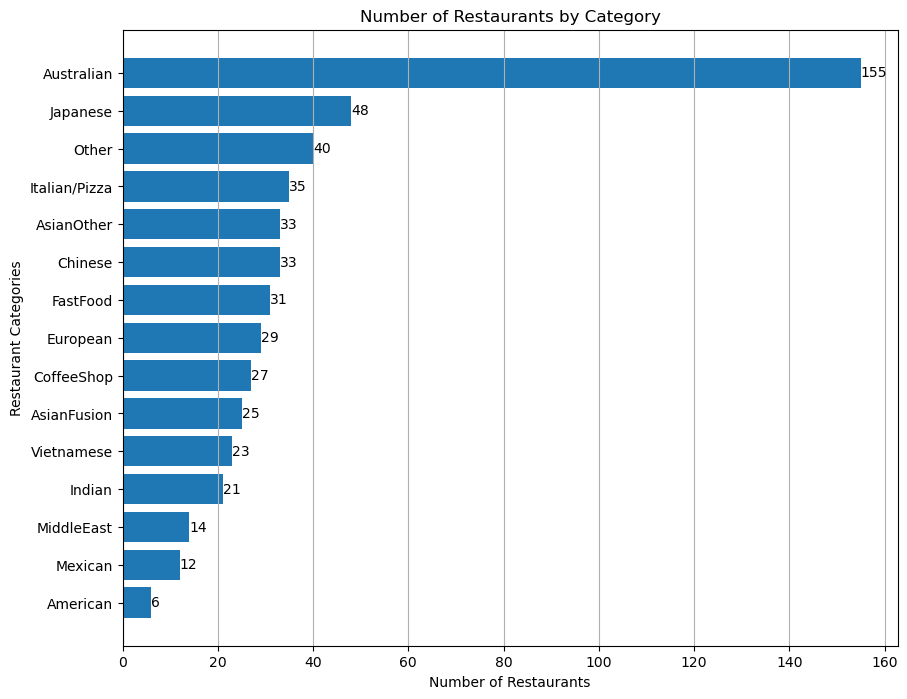

In [8]:
category_counts = data['categories'].value_counts(ascending=True)

# Creating the plot
plt.figure(figsize=(10, 8))  # Adjust the size of your plot as needed
bars = plt.barh(category_counts.index, category_counts.values)

plt.xlabel('Number of Restaurants')  # Label for the x-axis
plt.ylabel('Restaurant Categories')  # Label for the y-axis
plt.title('Number of Restaurants by Category')  # Title of the plot

# Add a vertical grid
plt.grid(axis='x')  # Specify a vertical grid line with axis='x'

# Annotate the bars with the number of restaurants
for bar in bars:
    plt.text(bar.get_width(),  # X position, slightly to the right for visibility
             bar.get_y() + bar.get_height() / 2,  # Y position, centered in the bar
             f'{int(bar.get_width())}',  # The text to display (number of occurrences)
             va='center')  # Center alignment

plt.show()  # Display the plot